# Keras Regression

In [1]:
# Predict the price of the house
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('../DATA/kc_house_data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
# Find missing data points
df.isnull()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21593,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21594,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21595,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()
# No missing found 

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


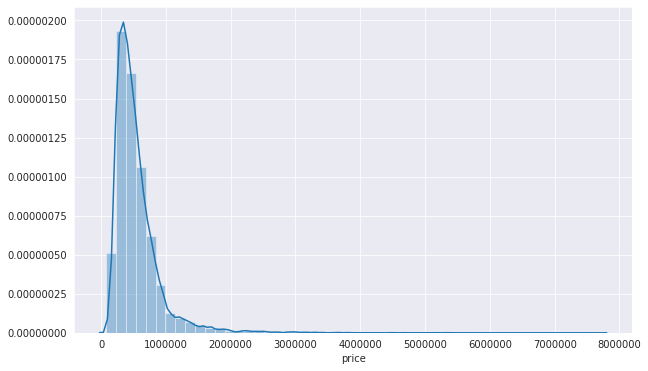

In [10]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

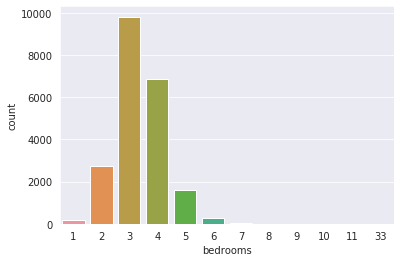

In [11]:
sns.countplot(df['bedrooms'])

In [12]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [13]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

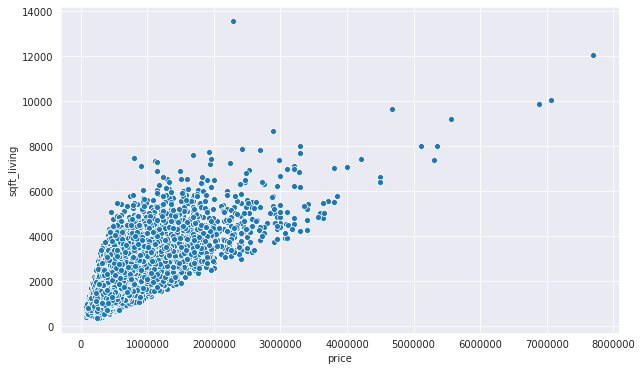

In [14]:
# sqft_living is highly correlated to price
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='sqft_living',data=df)

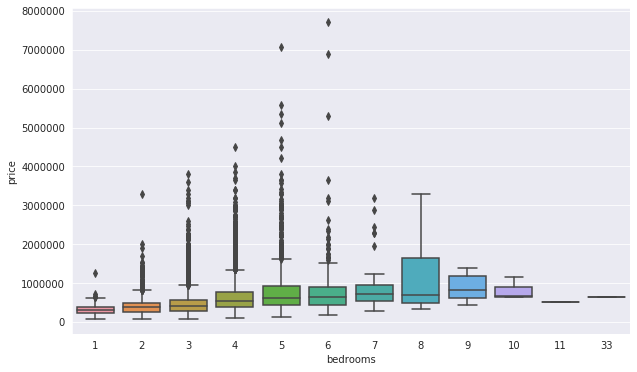

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms',y='price',data=df)

In [16]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

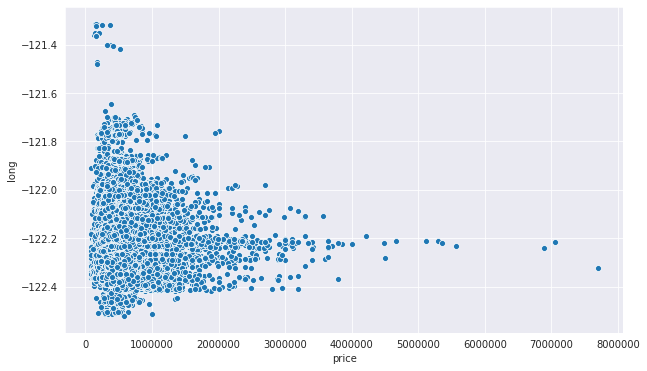

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='long',data=df)

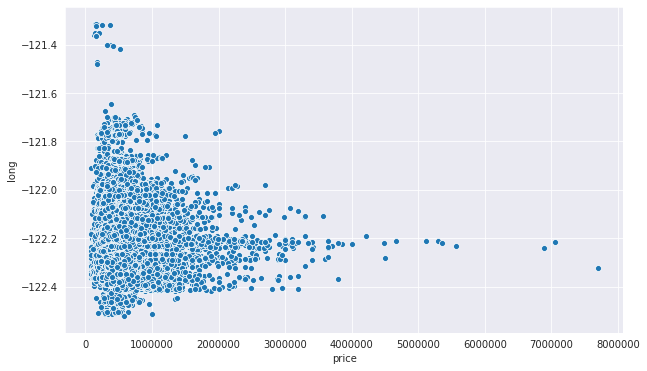

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='long',data=df)

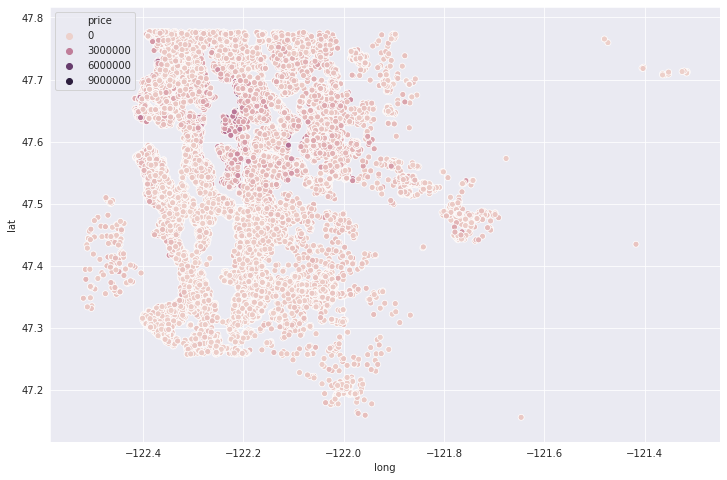

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [20]:
# Sort expensive house
df.sort_values('price',ascending=False).head(30)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [21]:
len(df)*0.01

215.97

In [22]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

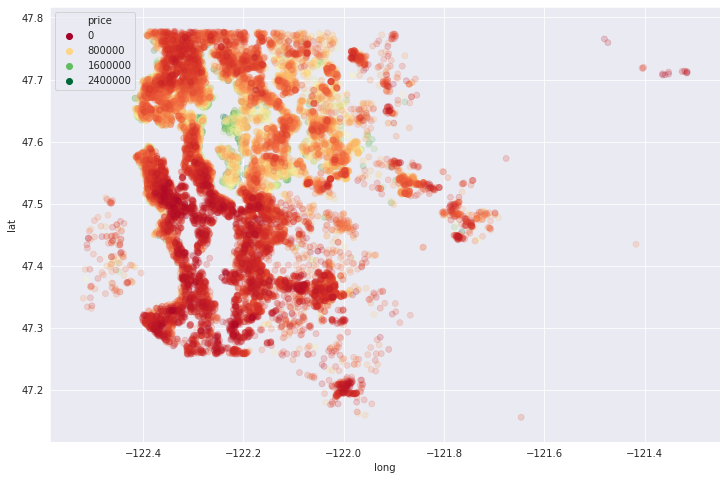

In [23]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=non_top_1_perc,hue='price',edgecolor=None,palette='RdYlGn',alpha=0.2)

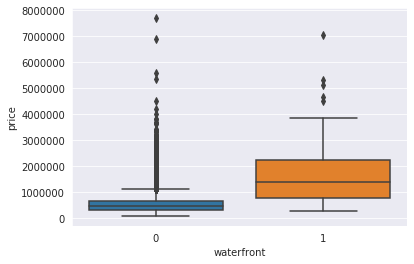

In [24]:

sns.boxplot(x='waterfront',y='price',data=df)

In [25]:
# Drop id in the column
df = df.drop('id',axis=1)

In [26]:
# Convert date column from string to datetime object
df['date'] = pd.to_datetime(df['date'])

In [27]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [28]:
# Extract month from datetime object
# Perform feature engineering

df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [29]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


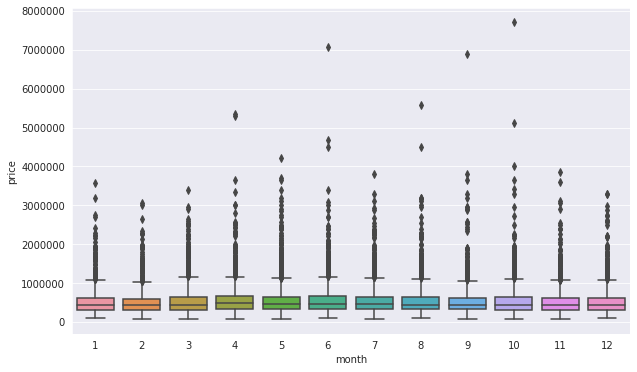

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(x='month',y='price',data=df)

In [31]:
df.groupby('month').mean()['price']

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

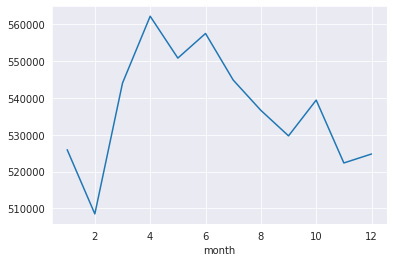

In [32]:
df.groupby('month').mean()['price'].plot()

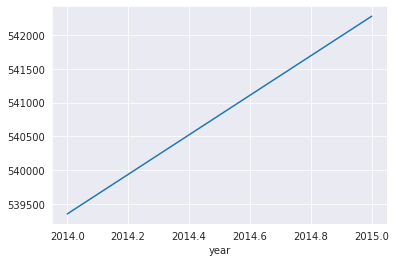

In [33]:
df.groupby('year').mean()['price'].plot()

In [34]:
df = df.drop('date',axis=1)

In [35]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [36]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [37]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [38]:
df = df.drop('zipcode',axis=1)

# Figure out if feature is continuous or categorical


### Model Evaluation and Prediction

In [41]:
# Scale a train-test split
# Values returns back numpy array
X = df.drop('price',axis=1).values
y = df['price'].values

In [42]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [45]:
# Scaling
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()

In [47]:
# Fitting and Scaling
X_train = scaler.fit_transform(X_train)

In [48]:
# Transform X_test set and no assumption given to prior test set
X_test = scaler.transform(X_test)

In [51]:
# Create the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [52]:
X_train.shape
# Compose of 19 neuron in layer

(15117, 19)

In [53]:
model = Sequential()

# This example may cause overfitting
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# Output predicted price
model.add(Dense(1))
# It is a regression and continuous -- mean squared error
model.compile(optimizer='adam',loss='mse')

In [55]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 4s 295us/sample - loss: 430238822713.4929 - val_loss: 418908617093.3729
Epoch 2/400
15117/15117 [==============================] - 1s 89us/sample - loss: 429127054871.8777 - val_loss: 415080840811.4568
Epoch 3/400
15117/15117 [==============================] - 2s 101us/sample - loss: 414027274786.3772 - val_loss: 380766681922.3704
Epoch 4/400
15117/15117 [==============================] - 1s 93us/sample - loss: 340527401975.9391 - val_loss: 262483603749.2938
Epoch 5/400
15117/15117 [==============================] - 1s 85us/sample - loss: 193514508351.6740 - val_loss: 121952986038.6765
Epoch 6/400
15117/15117 [==============================] - 1s 84us/sample - loss: 107022592489.7480 - val_loss: 95900964029.6296
Epoch 7/400
15117/15117 [==============================] - 1s 86us/sample - loss: 98300048219.4637 - val_loss: 94385433117.0766
Epoch 8/400
15117/15117 [=================

Epoch 64/400
15117/15117 [==============================] - 1s 80us/sample - loss: 39328841567.7650 - val_loss: 38050256607.7630
Epoch 65/400
15117/15117 [==============================] - 1s 76us/sample - loss: 39109534210.2692 - val_loss: 37916558611.5951
Epoch 66/400
15117/15117 [==============================] - 1s 78us/sample - loss: 38848881207.1051 - val_loss: 37614412342.3605
Epoch 67/400
15117/15117 [==============================] - 1s 62us/sample - loss: 38601073730.1803 - val_loss: 37350739755.6148
Epoch 68/400
15117/15117 [==============================] - 1s 87us/sample - loss: 38406088822.8807 - val_loss: 37183611127.7827
Epoch 69/400
15117/15117 [==============================] - 1s 87us/sample - loss: 38222508211.1001 - val_loss: 36931907396.8988
Epoch 70/400
15117/15117 [==============================] - 1s 74us/sample - loss: 38042104056.8705 - val_loss: 36727939127.6247
Epoch 71/400
15117/15117 [==============================] - 1s 74us/sample - loss: 37828189996.65

15117/15117 [==============================] - 1s 77us/sample - loss: 33299757569.3209 - val_loss: 31940550423.3877
Epoch 128/400
15117/15117 [==============================] - 1s 75us/sample - loss: 33253053284.8115 - val_loss: 31920790550.7556
Epoch 129/400
15117/15117 [==============================] - 1s 77us/sample - loss: 33244402338.6735 - val_loss: 31819338274.1333
Epoch 130/400
15117/15117 [==============================] - 1s 76us/sample - loss: 33194511510.2436 - val_loss: 31785667353.9160
Epoch 131/400
15117/15117 [==============================] - 1s 71us/sample - loss: 33167790838.8045 - val_loss: 31756435036.2864
Epoch 132/400
15117/15117 [==============================] - 1s 88us/sample - loss: 33123333583.6687 - val_loss: 31713852777.5605
Epoch 133/400
15117/15117 [==============================] - 1s 84us/sample - loss: 33088618461.8599 - val_loss: 31926841768.7704
Epoch 134/400
15117/15117 [==============================] - 1s 88us/sample - loss: 33061151165.4471 - v

15117/15117 [==============================] - 1s 75us/sample - loss: 31798715452.6935 - val_loss: 30174652901.4519
Epoch 191/400
15117/15117 [==============================] - 1s 73us/sample - loss: 31746767596.5083 - val_loss: 30204540665.0469
Epoch 192/400
15117/15117 [==============================] - 1s 84us/sample - loss: 31798977993.4368 - val_loss: 30148847231.6840
Epoch 193/400
15117/15117 [==============================] - 1s 81us/sample - loss: 31740306687.4412 - val_loss: 30117071935.2099
Epoch 194/400
15117/15117 [==============================] - 1s 76us/sample - loss: 31701493615.1755 - val_loss: 30078085590.2815
Epoch 195/400
15117/15117 [==============================] - 1s 79us/sample - loss: 31690739578.2846 - val_loss: 30241949554.4099
Epoch 196/400
15117/15117 [==============================] - 1s 77us/sample - loss: 31684983119.5756 - val_loss: 30074668757.6494
Epoch 197/400
15117/15117 [==============================] - 1s 75us/sample - loss: 31680380153.6157 - v

Epoch 253/400
15117/15117 [==============================] - 2s 154us/sample - loss: 30892093779.0980 - val_loss: 29196042942.8938
Epoch 254/400
15117/15117 [==============================] - 2s 138us/sample - loss: 30862864847.9397 - val_loss: 29144792895.8420
Epoch 255/400
15117/15117 [==============================] - 2s 132us/sample - loss: 30882198252.3728 - val_loss: 29144576439.9407
Epoch 256/400
15117/15117 [==============================] - 2s 121us/sample - loss: 30850857777.6014 - val_loss: 29098412244.3852
Epoch 257/400
15117/15117 [==============================] - 2s 136us/sample - loss: 30830447928.8832 - val_loss: 29050367898.8642
Epoch 258/400
15117/15117 [==============================] - 2s 126us/sample - loss: 30797301752.4133 - val_loss: 29105527704.3358
Epoch 259/400
15117/15117 [==============================] - 2s 131us/sample - loss: 30816744821.5768 - val_loss: 29035674444.4840
Epoch 260/400
15117/15117 [==============================] - 2s 121us/sample - loss

15117/15117 [==============================] - 2s 128us/sample - loss: 30262484886.0573 - val_loss: 28321024551.1901
Epoch 316/400
15117/15117 [==============================] - 1s 96us/sample - loss: 30186533792.8954 - val_loss: 28311689959.3481
Epoch 317/400
15117/15117 [==============================] - 1s 77us/sample - loss: 30163171805.0132 - val_loss: 28305734790.0049
Epoch 318/400
15117/15117 [==============================] - 1s 76us/sample - loss: 30172058396.7380 - val_loss: 28255526563.0815
Epoch 319/400
15117/15117 [==============================] - 2s 109us/sample - loss: 30142274023.5126 - val_loss: 28236905393.6198
Epoch 320/400
15117/15117 [==============================] - 2s 101us/sample - loss: 30104570586.8963 - val_loss: 28329250143.4469
Epoch 321/400
15117/15117 [==============================] - 1s 94us/sample - loss: 30203153379.3467 - val_loss: 28340324700.9185
Epoch 322/400
15117/15117 [==============================] - 1s 80us/sample - loss: 30145990830.7648 

Epoch 378/400
15117/15117 [==============================] - 1s 95us/sample - loss: 29526277230.8876 - val_loss: 27345810105.8370
Epoch 379/400
15117/15117 [==============================] - 1s 77us/sample - loss: 29509329959.8301 - val_loss: 27357128714.1136
Epoch 380/400
15117/15117 [==============================] - 1s 87us/sample - loss: 29475336540.3781 - val_loss: 27342897966.1432
Epoch 381/400
15117/15117 [==============================] - 2s 130us/sample - loss: 29519212374.5188 - val_loss: 27305373281.3432
Epoch 382/400
15117/15117 [==============================] - 2s 136us/sample - loss: 29456734467.7087 - val_loss: 27350347629.3531
Epoch 383/400
15117/15117 [==============================] - 2s 127us/sample - loss: 29503906401.1029 - val_loss: 27289125197.7481
Epoch 384/400
15117/15117 [==============================] - 2s 141us/sample - loss: 29425935925.6826 - val_loss: 27306417948.4444
Epoch 385/400
15117/15117 [==============================] - 2s 112us/sample - loss: 2

In [57]:
model.history.history

{'loss': [430238822713.49286,
  429127054871.87775,
  414027274786.3772,
  340527401975.93915,
  193514508351.674,
  107022592489.74797,
  98300048219.46365,
  96685660034.95508,
  95084771672.24608,
  93447109431.2914,
  91773758663.89575,
  90059948379.36205,
  88307921722.1364,
  86437122108.829,
  84539963661.46298,
  82540230904.87054,
  80474120280.33075,
  78247443718.62141,
  76029729354.20732,
  73719024513.39711,
  71338109504.31752,
  68931137250.00887,
  66524891437.43547,
  64132888034.77092,
  61854933802.96302,
  59769084202.72594,
  57821368175.04002,
  56103910993.31984,
  54646284320.78534,
  53420086872.635574,
  52351438633.47278,
  51467970458.39254,
  50670128854.764305,
  49970970347.6277,
  49362358872.364624,
  48790344456.010056,
  48257964149.864655,
  47803175455.80314,
  47328987905.642654,
  46905499031.85235,
  46489846727.16756,
  46073430592.85943,
  45705589135.65601,
  45355452082.185616,
  45026600734.160484,
  44672415698.073425,
  44347201260.84699

In [58]:
losses = pd.DataFrame(model.history.history)

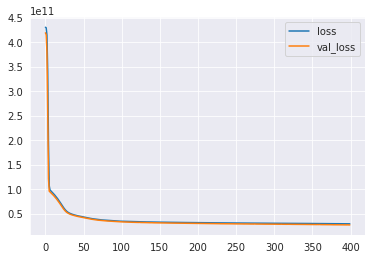

In [60]:
losses.plot()
# There is no occurence of overfitting

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [62]:
predictions = model.predict(X_test)

In [64]:
mean_squared_error(y_test,predictions)

27008978880.88005

In [65]:
# Can be easily interpret with MEA and RMSE
mean_absolute_error(y_test,predictions)

101589.74408938561

In [66]:
np.sqrt(mean_squared_error(y_test,predictions))

164344.08684488788

In [67]:
df['price'].describeibe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [69]:
5.402966e+05

540296.6

In [70]:
# Best possible score is 1.0
explained_variance_score(y_test,predictions)

0.7963603248001854

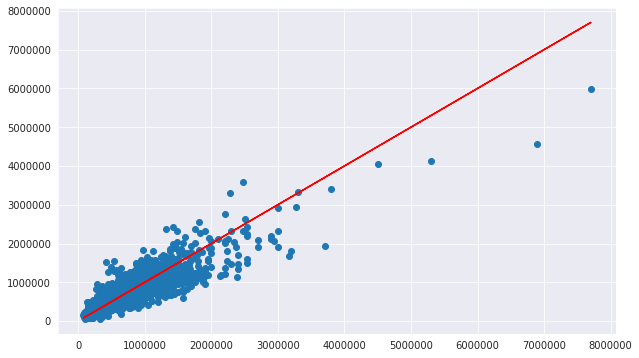

In [74]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')
# Red line represents the perfect prediction line

In [77]:
# How to the model to predict a brand new house

# Grap the first house
df.drop('price',axis=1).iloc[0]

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [78]:
single_house = df.drop('price',axis=1).iloc[0]

In [79]:
# Numpy values
single_house.values

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03,  2.01400e+03,  1.00000e+01])

In [80]:
single_house.values.reshape(-1,19)

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [81]:
scaler.transform(single_house.values.reshape(-1,19))

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.        , 0.81818182]])

In [82]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [84]:
model.predict(single_house)
# The predicted price that this particular house may sell out

array([[287177.44]], dtype=float32)

In [86]:
df.head(1)
#actual price at 221900 and predicted price at 287177 with this we have to retrain the model and reduce the mean squared error

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


In [ ]:
# Classification task on Tensorflow
# How to deal with overfitting